# 567. Permutation in String

## Description:

Given two strings s1 and s2, return true if s2 contains a 
permutation
 of s1, or false otherwise.

In other words, return true if one of s1's permutations is the substring of s2.

## Examples:

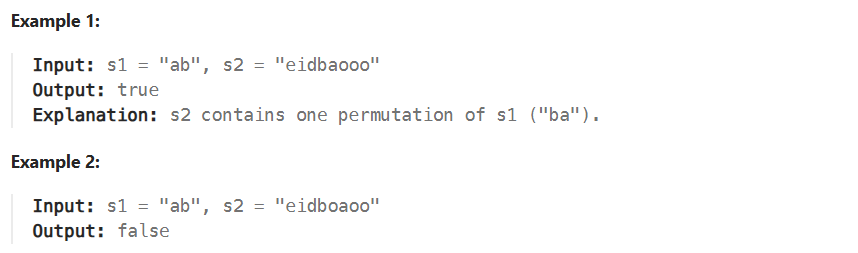

## Constraints:

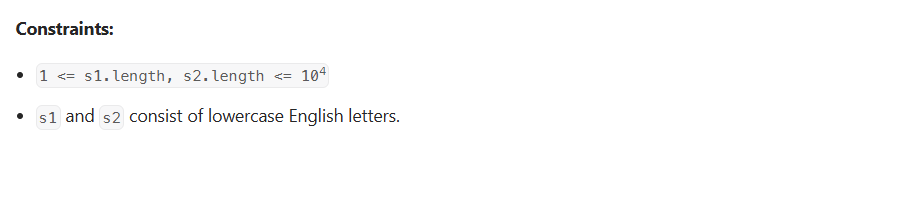

## Solution:

There are multiple solutions exists to solve this problem. 

we will see different solutions one  by one

## 1. Brute Force:

In [1]:
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        s1 = sorted(s1)

        for i in range(len(s2)):
            for j in range(i, len(s2)):
                subStr = s2[i : j + 1]
                subStr = sorted(subStr)
                if subStr == s1:
                    return True
        return False

Time Complexity:O(n^3 logn)

Space Complexity: O(n)


## 2. Hash Table:

In [2]:
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        count1 = {}
        for c in s1:
            count1[c] = 1 + count1.get(c, 0)
        
        need = len(count1)
        for i in range(len(s2)):
            count2, cur = {}, 0
            for j in range(i, len(s2)):
                count2[s2[j]] = 1 + count2.get(s2[j], 0)
                if count1.get(s2[j], 0) < count2[s2[j]]:
                    break
                if count1.get(s2[j], 0) == count2[s2[j]]:
                    cur += 1
                if cur == need:
                    return True
        return False

Time Complexity: O(m*n)
Space complexity: O(n)

Where n is the length of the string1 and m is the length of string2.

## 3. Sliding Window:

In [3]:
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        if len(s1)>len(s2):
            return False
        s1Count, s2Count=[0]*26, [0]*26
        for i in range(len(s1)):
            s1Count[ord(s1[i])-ord('a')]+=1
            s2Count[ord(s2[i])-ord('a')]+=1
        
        matches=0
        for i in range(26):
            matches+= ( 1 if s1Count[i] == s2Count[i] else 0)
        
        left=0
        for right in range(len(s1), len(s2)):
            if matches == 26:
                return True
            
            index= ord(s2[right])- ord('a')
            s2Count[index] +=1
            if s1Count[index]== s2Count[index]:
                matches+=1
            elif s1Count[index]+1== s2Count[index]:
                matches -=1

            index= ord(s2[left])- ord('a')
            s2Count[index] -=1
            if s1Count[index]== s2Count[index]:
                matches+=1
            elif s1Count[index]-1== s2Count[index]:
                matches -=1
            left+=1
        return matches ==26


        

Time Complexity: O(n)
Space Co